In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.options.display.max_rows = 10

In [234]:
df = pd.read_csv('data/gdp.csv')
df

,Entity,Code,Year,GDP (constant 2010 US$)
0,Afghanistan,AFG,2002,8.013233e+09
1,Afghanistan,AFG,2003,8.689884e+09
2,Afghanistan,AFG,2004,8.781610e+09
3,Afghanistan,AFG,2005,9.762979e+09
4,Afghanistan,AFG,2006,1.030523e+10
...,...,...,...,...
8864,Zimbabwe,ZWE,2013,1.418193e+10
8865,Zimbabwe,ZWE,2014,1.448359e+10
8866,Zimbabwe,ZWE,2015,1.472830e+10
8867,Zimbabwe,ZWE,2016,1.481899e+10


In [235]:
df.sample(5)

,Entity,Code,Year,GDP (constant 2010 US$)
8611,Vanuatu,VUT,1992,3.979251e+08
4278,Jordan,JOR,1991,8.847708e+09
1972,Costa Rica,CRI,1994,1.905719e+10
3159,Ghana,GHA,1988,1.109530e+10
3242,Greece,GRC,2013,2.439897e+11


In [236]:
df["gdp"] = df["GDP (constant 2010 US$)"] / 1_000_000_000
df

,Entity,Code,Year,GDP (constant 2010 US$),gdp
0,Afghanistan,AFG,2002,8.013233e+09,8.013233
1,Afghanistan,AFG,2003,8.689884e+09,8.689884
2,Afghanistan,AFG,2004,8.781610e+09,8.781610
3,Afghanistan,AFG,2005,9.762979e+09,9.762979
4,Afghanistan,AFG,2006,1.030523e+10,10.305228
...,...,...,...,...,...
8864,Zimbabwe,ZWE,2013,1.418193e+10,14.181927
8865,Zimbabwe,ZWE,2014,1.448359e+10,14.483588
8866,Zimbabwe,ZWE,2015,1.472830e+10,14.728302
8867,Zimbabwe,ZWE,2016,1.481899e+10,14.818986


In [237]:
df[df["Entity"] == "China"]

,Entity,Code,Year,GDP (constant 2010 US$),gdp
1726,China,CHN,1960,1.279381e+11,127.938142
1727,China,CHN,1961,9.304941e+10,93.049411
1728,China,CHN,1962,8.785725e+10,87.857254
1729,China,CHN,1963,9.690655e+10,96.906551
1730,China,CHN,1964,1.145242e+11,114.524162
...,...,...,...,...,...
1779,China,CHN,2013,7.766513e+12,7766.512756
1780,China,CHN,2014,8.333287e+12,8333.286913
1781,China,CHN,2015,8.908301e+12,8908.300778
1782,China,CHN,2016,9.505157e+12,9505.156931


In [238]:
df["Entity"] == "China"

0       False
1       False
2       False
3       False
4       False
        ...  
8864    False
8865    False
8866    False
8867    False
8868    False
Name: Entity, Length: 8869, dtype: bool

In [239]:
df[(df["Entity"] == "China") & (df["Year"] == 2017)]

,Entity,Code,Year,GDP (constant 2010 US$),gdp
1783,China,CHN,2017,1.016101e+13,10161.012759


In [240]:
df.query('Entity == "China" and Year == "2017"')

,Entity,Code,Year,GDP (constant 2010 US$),gdp


In [241]:
list_of_countries = ["China", "United States", "Germany", "Japan"]
df[df["Entity"].isin(list_of_countries)]

,Entity,Code,Year,GDP (constant 2010 US$),gdp
1726,China,CHN,1960,1.279381e+11,127.938142
1727,China,CHN,1961,9.304941e+10,93.049411
1728,China,CHN,1962,8.785725e+10,87.857254
1729,China,CHN,1963,9.690655e+10,96.906551
1730,China,CHN,1964,1.145242e+11,114.524162
...,...,...,...,...,...
8490,United States,USA,2013,1.580286e+13,15802.855301
8491,United States,USA,2014,1.620886e+13,16208.861247
8492,United States,USA,2015,1.667269e+13,16672.691918
8493,United States,USA,2016,1.692033e+13,16920.327942


In [242]:
df.query('Entity in @list_of_countries')

,Entity,Code,Year,GDP (constant 2010 US$),gdp
1726,China,CHN,1960,1.279381e+11,127.938142
1727,China,CHN,1961,9.304941e+10,93.049411
1728,China,CHN,1962,8.785725e+10,87.857254
1729,China,CHN,1963,9.690655e+10,96.906551
1730,China,CHN,1964,1.145242e+11,114.524162
...,...,...,...,...,...
8490,United States,USA,2013,1.580286e+13,15802.855301
8491,United States,USA,2014,1.620886e+13,16208.861247
8492,United States,USA,2015,1.667269e+13,16672.691918
8493,United States,USA,2016,1.692033e+13,16920.327942


In [243]:
list_of_countries = ["United States", "China", "Japan", "Germany", "United Kingdom", "India"]
top6 = df.query('Entity in @list_of_countries and Year == 2017')
top6

,Entity,Code,Year,GDP (constant 2010 US$),gdp
1783,China,CHN,2017,1.016101e+13,10161.012759
3130,Germany,DEU,2017,3.865759e+12,3865.759081
3789,India,IND,2017,2.629542e+12,2629.542212
4261,Japan,JPN,2017,6.156329e+12,6156.328721
8436,United Kingdom,GBR,2017,2.806903e+12,2806.903097
8494,United States,USA,2017,1.730498e+13,17304.984279


<Axes: xlabel='Entity'>

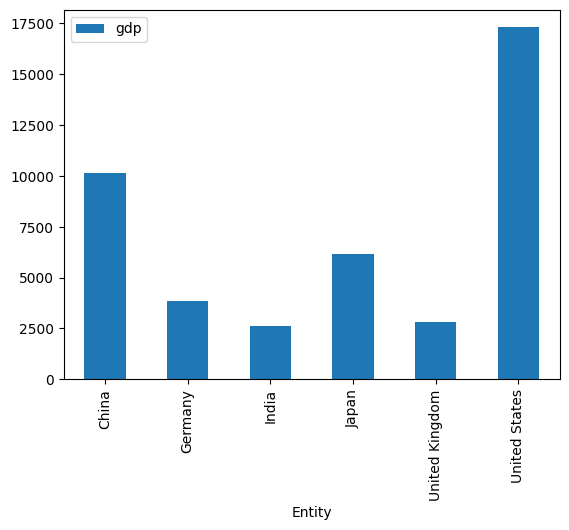

In [244]:
top6.plot(x = "Entity", y = "gdp", kind = "bar")

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'China'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'United Kingdom'),
  Text(5, 0, 'United States')])

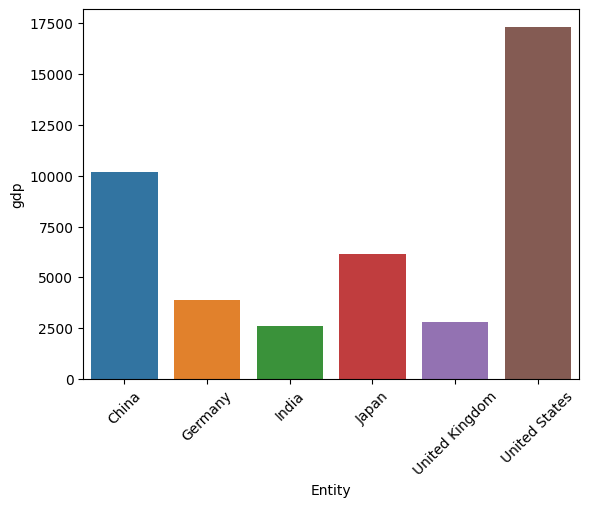

In [245]:
sns.barplot(data=top6, x="Entity", y="gdp", hue="Entity")
plt.xticks(rotation=45)

In [246]:
fig = px.bar(top6, x="Entity", y="gdp", color="Entity", color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [247]:
df_1960 = df.query('Year == 1960')

In [248]:
gdp_1960 = sum(df_1960['gdp'])
gdp_1960

9025.83485442651

In [249]:
df.groupby('Year').agg("sum")[['gdp']]

,gdp
Year,
1960,9025.834854
1961,9434.021757
1962,9959.004555
1963,10477.823331
1964,11176.230223
...,...
2013,70951.987117
2014,72967.372451
2015,74627.950281


In [250]:
px.line(df.groupby('Year')[['gdp']].agg('sum'))

In [251]:
df.groupby('Year')[['gdp']].agg('max')

,gdp
Year,
1960,3078.071080
1961,3148.866715
1962,3340.947585
1963,3487.949279
1964,3690.250337
...,...
2013,15802.855301
2014,16208.861247
2015,16672.691918


In [252]:
px.line(df.groupby('Year')[['gdp']].agg('max'))

In [253]:
df.groupby('Year')[['gdp']].agg('min')

,gdp
Year,
1960,0.098736
1961,0.103566
1962,0.108633
1963,0.114017
1964,0.119718
...,...
2013,0.034409
2014,0.034873
2015,0.038061


In [254]:
df.groupby('Year')[['gdp']].agg('min')

,gdp
Year,
1960,0.098736
1961,0.103566
1962,0.108633
1963,0.114017
1964,0.119718
...,...
2013,0.034409
2014,0.034873
2015,0.038061


In [255]:
px.line(df.groupby('Year')[['gdp']].agg('min'))

In [256]:
largest_gdps = df.groupby('Year')[['gdp']].agg('max')
smallest_gdps = df.groupby('Year')[['gdp']].agg('min')

ratio_largest_to_smallest = largest_gdps / smallest_gdps
ratio_largest_to_smallest

,gdp
Year,
1960,31174.904577
1961,30404.457057
1962,30754.422037
1963,30591.375224
1964,30824.487623
...,...
2013,459267.263374
2014,464801.557315
2015,438051.587561


In [257]:
def ratio_of_largest_to_smallest(s):
    largest_value = max(s)
    smallest_value = min(s)

    return largest_value / smallest_value

ratio_largest_to_smallest_2 = df.groupby('Year')[['gdp']].agg(ratio_of_largest_to_smallest)
ratio_largest_to_smallest_2

,gdp
Year,
1960,31174.904577
1961,30404.457057
1962,30754.422037
1963,30591.375224
1964,30824.487623
...,...
2013,459267.263374
2014,464801.557315
2015,438051.587561


In [258]:
(ratio_largest_to_smallest_2 == ratio_largest_to_smallest).agg('all')

gdp    True
dtype: bool

In [259]:
# This gives us the min gdp per year, but it doesn't tell us which country it's attributed to
# That's because the aggregate function is applied separately to each column, so you can't use a given row
df.groupby('Year').agg('min')

# In order to keep the relevant columns, we need to sort by gdp and pick the first row
def get_first_item(s):
    return s.iloc[0]

df.sort_values('gdp').groupby('Year').agg(get_first_item)

,Entity,Code,GDP (constant 2010 US$),gdp
Year,,,,
1960,Belize,BLZ,9.873554e+07,0.098736
1961,Belize,BLZ,1.035660e+08,0.103566
1962,Belize,BLZ,1.086331e+08,0.108633
1963,Belize,BLZ,1.140174e+08,0.114017
1964,Belize,BLZ,1.197181e+08,0.119718
...,...,...,...,...
2013,Tuvalu,TUV,3.440884e+07,0.034409
2014,Tuvalu,TUV,3.487265e+07,0.034873
2015,Tuvalu,TUV,3.806102e+07,0.038061


In [260]:
# built-in way to do the above:

df.sort_values('gdp').groupby('Year').first()

,Entity,Code,GDP (constant 2010 US$),gdp
Year,,,,
1960,Belize,BLZ,9.873554e+07,0.098736
1961,Belize,BLZ,1.035660e+08,0.103566
1962,Belize,BLZ,1.086331e+08,0.108633
1963,Belize,BLZ,1.140174e+08,0.114017
1964,Belize,BLZ,1.197181e+08,0.119718
...,...,...,...,...
2013,Tuvalu,TUV,3.440884e+07,0.034409
2014,Tuvalu,TUV,3.487265e+07,0.034873
2015,Tuvalu,TUV,3.806102e+07,0.038061


In [261]:
df.groupby('Year').agg({'gdp': 'min'})

,gdp
Year,
1960,0.098736
1961,0.103566
1962,0.108633
1963,0.114017
1964,0.119718
...,...
2013,0.034409
2014,0.034873
2015,0.038061


In [262]:
# how much of the world gdp did China produce every year
total_gdp = df.groupby('Year').sum()[['GDP (constant 2010 US$)', 'gdp']]
df.query('Entity == "China"').set_index('Year') / total_gdp

,Code,Entity,GDP (constant 2010 US$),gdp
Year,,,,
1960,NaN,NaN,0.014175,0.014175
1961,NaN,NaN,0.009863,0.009863
1962,NaN,NaN,0.008822,0.008822
1963,NaN,NaN,0.009249,0.009249
1964,NaN,NaN,0.010247,0.010247
...,...,...,...,...
2013,NaN,NaN,0.109462,0.109462
2014,NaN,NaN,0.114206,0.114206
2015,NaN,NaN,0.119369,0.119369


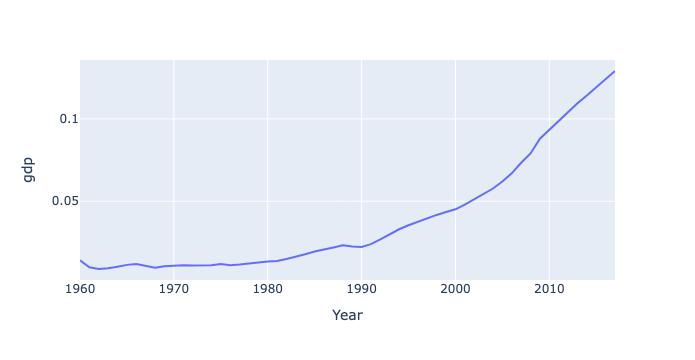

In [263]:
px.line(df.query('Entity == "China"').set_index('Year') / total_gdp, y='gdp')

In [264]:
# how much each country contributed to gdp each year
share_of_world_economy = df.set_index(['Year', 'Entity']) / total_gdp
share_of_world_economy

,,Code,GDP (constant 2010 US$),gdp
Year,Entity,,,
2002,Afghanistan,NaN,0.000155,0.000155
2003,Afghanistan,NaN,0.000163,0.000163
2004,Afghanistan,NaN,0.000158,0.000158
2005,Afghanistan,NaN,0.000169,0.000169
2006,Afghanistan,NaN,0.000171,0.000171
...,...,...,...,...
2013,Zimbabwe,NaN,0.000200,0.000200
2014,Zimbabwe,NaN,0.000198,0.000198
2015,Zimbabwe,NaN,0.000197,0.000197


In [265]:
share_of_world_economy = share_of_world_economy.reset_index()
share_of_world_economy

,Year,Entity,Code,GDP (constant 2010 US$),gdp
0,2002,Afghanistan,NaN,0.000155,0.000155
1,2003,Afghanistan,NaN,0.000163,0.000163
2,2004,Afghanistan,NaN,0.000158,0.000158
3,2005,Afghanistan,NaN,0.000169,0.000169
4,2006,Afghanistan,NaN,0.000171,0.000171
...,...,...,...,...,...
8864,2013,Zimbabwe,NaN,0.000200,0.000200
8865,2014,Zimbabwe,NaN,0.000198,0.000198
8866,2015,Zimbabwe,NaN,0.000197,0.000197
8867,2016,Zimbabwe,NaN,0.000194,0.000194


In [266]:
px.line(share_of_world_economy, x='Year', y='gdp', color='Entity')

In [267]:
top6_share = share_of_world_economy.query('Entity in @list_of_countries')
px.line(top6_share, x='Year', y='gdp', color='Entity')

# Note: looking at the data, Germany (and presumably others) were added later,
# which is skewing results (note how US and Japan seemingly dropped in 1970 when
# Germany was added

In [279]:
gdp1960_values_by_entity = df.query('Year == 1960').set_index(['Entity'])[['gdp']]
gdp1960_values_by_entity

,gdp
Entity,
Algeria,27.434399
Argentina,115.573869
Australia,199.233335
Austria,91.836703
Bahamas,1.942538
...,...
United States,3078.071080
Uruguay,13.898153
Venezuela,101.424598


In [283]:
temp = df.set_index('Entity')
temp['gdp_ratio'] = temp['gdp'] / gdp1960_values_by_entity['gdp']
temp.reset_index()
temp.query('Entity in @list_of_countries')

,Code,Year,GDP (constant 2010 US$),gdp,gdp_ratio
Entity,,,,,
China,CHN,1960,1.279381e+11,127.938142,1.000000
China,CHN,1961,9.304941e+10,93.049411,0.727300
China,CHN,1962,8.785725e+10,87.857254,0.686717
China,CHN,1963,9.690655e+10,96.906551,0.757448
China,CHN,1964,1.145242e+11,114.524162,0.895153
...,...,...,...,...,...
United States,USA,2013,1.580286e+13,15802.855301,5.134012
United States,USA,2014,1.620886e+13,16208.861247,5.265915
United States,USA,2015,1.667269e+13,16672.691918,5.416604


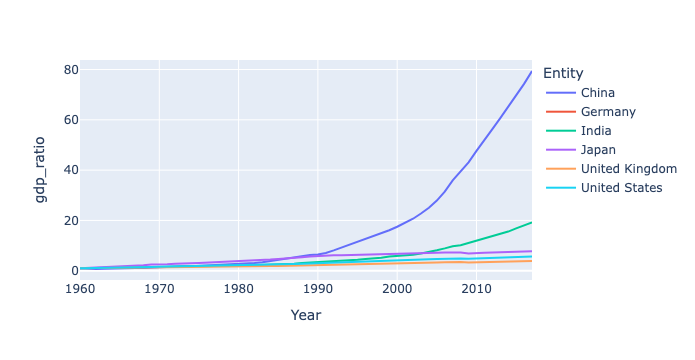

In [286]:
px.line(temp.reset_index().query('Entity in @list_of_countries'), x='Year', y='gdp_ratio', color='Entity')

In [288]:
temp.dropna()

,Code,Year,GDP (constant 2010 US$),gdp,gdp_ratio
Entity,,,,,
Algeria,DZA,1960,2.743440e+10,27.434399,1.000000
Algeria,DZA,1961,2.370183e+10,23.701828,0.863946
Algeria,DZA,1962,1.903611e+10,19.036113,0.693878
Algeria,DZA,1963,2.556811e+10,25.568114,0.931973
Algeria,DZA,1964,2.706114e+10,27.061141,0.986395
...,...,...,...,...,...
Zimbabwe,ZWE,2013,1.418193e+10,14.181927,4.216605
Zimbabwe,ZWE,2014,1.448359e+10,14.483588,4.306296
Zimbabwe,ZWE,2015,1.472830e+10,14.728302,4.379055


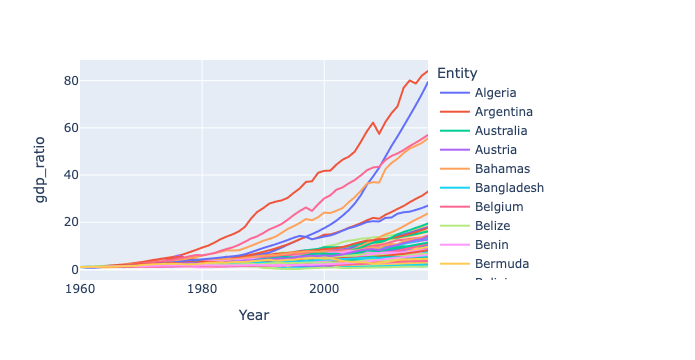

In [289]:
px.line(temp.reset_index().dropna(), x='Year', y='gdp_ratio', color='Entity')

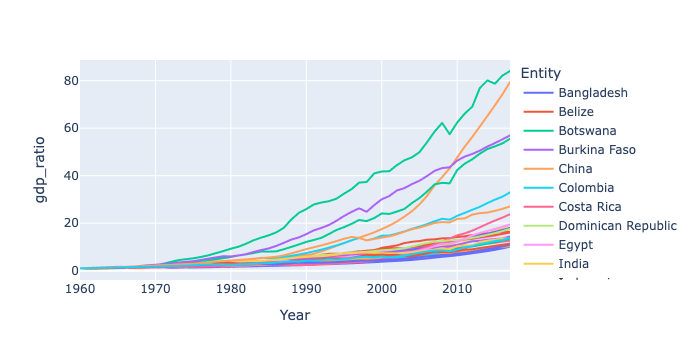

In [290]:
def max_gdp_ratio_gt_10(s):
    return s['gdp_ratio'].max() > 10

px.line(temp.reset_index().dropna().groupby('Entity').filter(max_gdp_ratio_gt_10).reset_index(), x='Year', y='gdp_ratio', color='Entity')